In [56]:
# use conda or pip to install these dependencies
import pandas as pd
import numpy as np
import folium
import psycopg2 as pg
import pandas.io.sql as psql


# Load up AIS data from Postgres

In [74]:
conn = pg.connect(host="localhost", user="cpsarason", password="get!postgres")
df = pd.read_sql('select * from ais_near_ooi', con=conn)

# cursor = conn.cursor()
# cursor.execute('SELECT * FROM ais_near_ooi')
# rows = cursor.fetchall()
conn.close()

In [58]:
'''
#alternatively, load up into dataframe from CSV
df = pd.read_csv('ais_lessthan_50km.csv')
'''

"\n#alternatively, load up into dataframe from CSV\ndf = pd.read_csv('../data/processed/ais_near_ooi.csv')\n"

In [77]:
#Convert dataframe to geopandas
import geopandas as gp
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(df.lon, df.lat)]

crs = {'init': 'epsg:4326'}
gdf = gp.GeoDataFrame(df, crs=crs, geometry=geometry)


In [78]:
gdf

,mmsi,basedatetime,lat,lon,sog,cog,heading,vesselname,imo,callsign,vesseltype,vesselstatus,vessellength,vesselwidth,draft,cargo,geom,id,geometry
0,367079690,2016-01-12 10:22:17,45.84372,-124.17800,1.5,4.7,511.0,None,None,None,None,None,NaN,NaN,NaN,None,0101000020E610000008AC1C5A640B5FC0957D5704FFEB...,83,POINT (-124.178 45.84372)
1,367079690,2016-01-12 05:14:04,45.85248,-124.19212,8.9,45.5,511.0,None,None,None,None,None,NaN,NaN,NaN,None,0101000020E6100000153AAFB14B0C5FC03E3F8C101EED...,7734552,POINT (-124.19212 45.85248)
2,338616000,2016-01-12 00:03:14,46.46533,-124.62937,8.6,-100.3,297.0,DUBLIN SEA,IMO9492684,WDE9779,1025,under way using engine,39.94,13.42,NaN,31,0101000020E610000058C51B9947285FC081ECF5EE8F3B...,7790897,POINT (-124.62937 46.46533)
3,367079690,2016-01-12 00:04:19,46.10012,-124.28385,7.5,-188.9,511.0,None,None,None,None,None,NaN,NaN,NaN,None,0101000020E61000000EBE30992A125FC077D66EBBD00C...,7791296,POINT (-124.28385 46.10012)
4,367531260,2016-01-12 00:00:00,46.37670,-124.28266,0.6,51.3,511.0,SOUTHEAST,IMO8855994,WDG3942,1001,under way using engine,20.12,6.71,NaN,None,0101000020E6100000CBF8F71917125FC09C33A2B43730...,7791592,POINT (-124.28266 46.3767)
5,367531260,2016-01-12 00:01:01,46.37658,-124.28282,3.0,111.3,511.0,SOUTHEAST,IMO8855994,WDG3942,1001,under way using engine,20.12,6.71,NaN,None,0101000020E6100000E7A90EB919125FC0F12900C63330...,7791633,POINT (-124.28282 46.37658)
6,367154830,2016-01-12 00:08:55,46.44474,-124.16232,1.7,28.5,511.0,ALEUTIAN ISLE,None,WDG2348,1001,None,15.00,5.60,NaN,None,0101000020E610000026DF6C73630A5FC08D9C853DED38...,7794183,POINT (-124.16232 46.44474)
7,367060330,2016-01-12 00:05:37,46.30362,-124.04199,0.0,0.0,511.0,ANITA D,None,WDI7169,1001,undefined,20.42,6.10,NaN,None,0101000020E61000009430D3F6AF025FC0AD342905DD26...,7795855,POINT (-124.04199 46.30362)
8,367060330,2016-01-12 00:06:38,46.30362,-124.04200,0.0,0.0,511.0,ANITA D,None,WDI7169,1001,undefined,20.42,6.10,NaN,None,0101000020E6100000A69BC420B0025FC0AD342905DD26...,7795885,POINT (-124.042 46.30362)
9,367060330,2016-01-12 00:28:54,46.30360,-124.04200,0.0,53.5,511.0,ANITA D,None,WDI7169,1001,undefined,20.42,6.10,NaN,None,0101000020E6100000A69BC420B0025FC06688635DDC26...,7796562,POINT (-124.042 46.3036)


In [79]:
gdf.to_crs(epsg=32610,inplace=True)


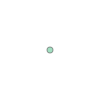

In [110]:
hydrophone = gp.GeoSeries([Point(-124.3055, 44.6373)],crs=crs)
utm_hydro = hydrophone.to_crs(epsg=32610)
utm_hydro.values[0]

In [125]:
gdf['distance'] = gdf.geometry.distance(utm_hydro.values[0])


Oregon Shelf Cabled Benthic Experiment Package
44.6373, -124.3055

In [185]:
close_ships = gdf.loc[gdf['distance'] < 50000]
len(close_ships)

1325

In [186]:
lon, lat = -124.3055, 44.6373
m = folium.Map(location=[lat, lon], zoom_start=10)
folium.Marker(location=[lat, lon], popup='Benthic Hydrophone').add_to(m)

for index, row in close_ships.iterrows():
    folium.CircleMarker(location=[row[2], row[3]], radius=5, fill=True,color='#FF0000', fill_opacity=1,popup='MMSI: {}'.format(row[0])).add_to(m)
m


In [187]:
len(close_ships)

1325

In [188]:
close_ships.to_csv('ais_lessthan_50km.csv')